In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


In [2]:
data = pd.read_csv("../input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
import pandas_profiling as pp
pp.ProfileReport(data)

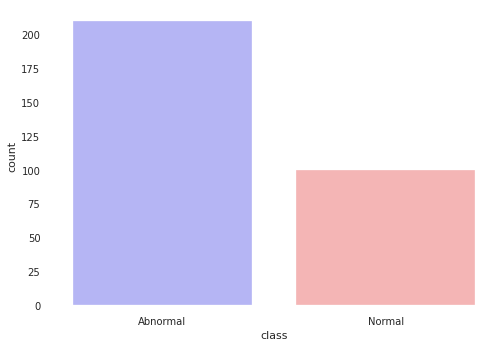

In [5]:
import seaborn as sns
sns.countplot(x="class", data=data, palette="bwr")

plt.show()

In [6]:
# Determination categorical features
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics: continue
    categorical_columns.append(col)
categorical_columns

['class']

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encoding categorical features
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))

In [8]:
target_name = 'class'
data_target = data[target_name]
data = data.drop([target_name], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, data_target, test_size=0.3, random_state=1)

In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train

array([[ 0.92572613,  0.2149739 ,  0.65033004,  0.99063793, -1.84455104,
         1.06498488],
       [-0.65397006, -0.42760334, -0.00372032, -0.50431038,  0.64366993,
        -0.64176217],
       [ 1.1879946 ,  3.1801419 ,  0.02451502, -0.78801926, -0.63642388,
         1.01987806],
       ...,
       [ 1.47835783,  1.62701552,  0.47509421,  0.67178549,  0.58339904,
         1.18324535],
       [ 0.23109833,  0.28012954, -0.62693646,  0.08672528, -0.44418254,
        -0.92847072],
       [-1.44178013,  0.22565131, -1.66472061, -1.940284  ,  1.55284247,
        -0.66152032]])

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [13]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=4, init='uniform', activation='relu', input_dim=6))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

# Adding the second hidden layer
classifier.add(Dense(output_dim=4, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

In [14]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=40, nb_epoch=150)

Epoch 1/150
217/217 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.6636
Epoch 2/150
217/217 [==============================] - 0s 46us/step - loss: 0.6919 - accuracy: 0.6636
Epoch 3/150
217/217 [==============================] - 0s 50us/step - loss: 0.6908 - accuracy: 0.6636
Epoch 4/150
217/217 [==============================] - 0s 46us/step - loss: 0.6898 - accuracy: 0.6636
Epoch 5/150
217/217 [==============================] - 0s 46us/step - loss: 0.6887 - accuracy: 0.6636
Epoch 6/150
217/217 [==============================] - 0s 50us/step - loss: 0.6875 - accuracy: 0.6636
Epoch 7/150
217/217 [==============================] - 0s 45us/step - loss: 0.6864 - accuracy: 0.6636
Epoch 8/150
217/217 [==============================] - 0s 47us/step - loss: 0.6848 - accuracy: 0.6636
Epoch 9/150
217/217 [==============================] - 0s 46us/step - loss: 0.6835 - accuracy: 0.6636
Epoch 10/150
217/217 [==============================] - 0s 46us/step - loss: 0.6816

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[62,  4],
       [ 7, 20]])

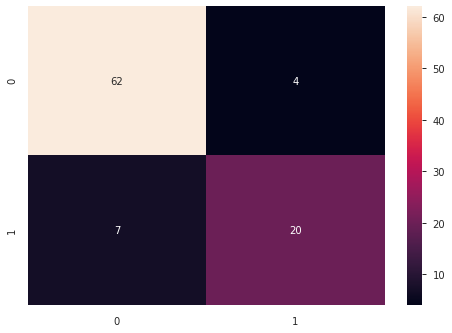

In [19]:
sns.heatmap(cm,annot=True)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8817204301075269

In [21]:
accuracy = accuracy_score(y_test,y_pred)*100

In [22]:
accuracy

88.17204301075269